# Bike Sharing Assignment

### Step 1: Reading and Understanding the Data

In [1]:
#importing the package

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the Dataset

boombikes_data = pd.read_csv('day.csv')
boombikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
boombikes_data.shape

(730, 16)

In [4]:
#taking summary of the data
boombikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Checking the data type of the columns
boombikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking if there is any null value
boombikes_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in boom bikes data

### Removing the column

In [7]:
#We are removing instant column as instance is an index column
boombikes_data.drop(['instant'],axis=1,inplace=True)

In [8]:
#checking the table to confirm
boombikes_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<i>instant column is removed</i>

As per the data definition in yr column <code style="background:yellow;color:black">0 = 2018 and 1 = 2019</code> <br>
and in dteday also we can see for year <code style="background:yellow;color:black">2018 and 2019</code>.<br>
So we will remove the <code style="background:yellow;color:black">dteday</code> column

In [9]:
# removing dteday column
boombikes_data.drop(['dteday'],axis=1,inplace=True)

In [10]:
#checking the table to confirm
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


As <code style="background:yellow;color:black">cnt = casual + registered</code> and cnt is our target variable ,so we are removing casual and registered column

In [11]:
#removing casual and registered column

boombikes_data.drop(['casual','registered'],axis=1,inplace=True)

In [12]:
#checking the table to confirm
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Renaming Columns

We are renaming columns as per below <br>
<ul>
 <li>season : season (1:spring, 2:summer, 3:fall, 4:winter)</li>
 <li>yr : year (0: 2018, 1:2019)</li>
 <li>mnth : month ( 1 to 12)</li>
 <li>weekday : day of the week</li>
 <li>weathersit :
     <ul>
         <li> 1: Clear, Few clouds, Partly cloudy, Partly cloudy </li>
		<li> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist </li>
		<li> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds </li>
		<li> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </li>
     </ul>
 </li>
</ul>

In [13]:
#renaming season
boombikes_data['season'].replace({1:'Spring' , 2:'summer' , 3:'fall' , 4:'winter'},inplace=True)

#renaming month
boombikes_data['mnth'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

#renaming weekday
boombikes_data['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

#rename wheathersit
boombikes_data['weathersit'].replace({1:'Clear_FullClouds',2:'Mist+Cloudy',3:'LightSnow_LightRain'},inplace=True)


In [14]:
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear_FullClouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear_FullClouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear_FullClouds,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the Data

#### 1. Univariate analysis

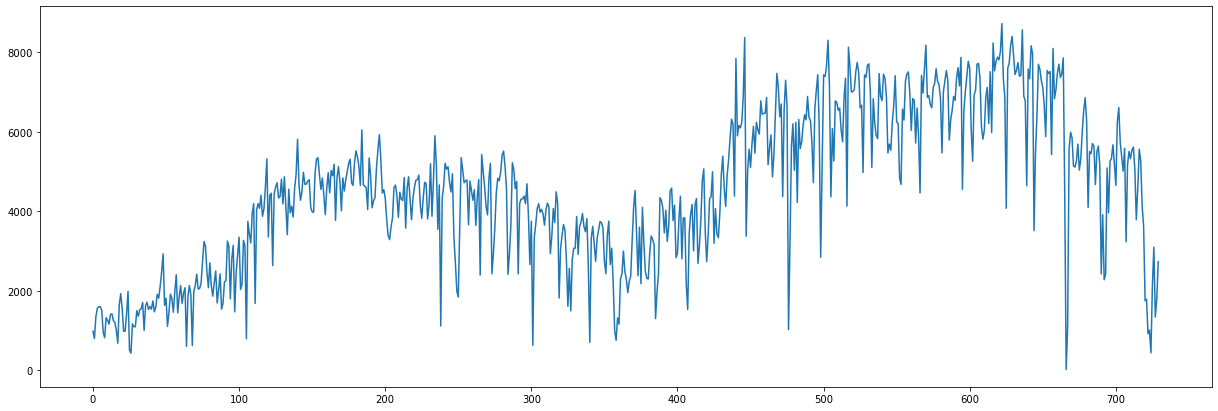

In [15]:
# Visualization of a pattern of the demand for the period of 2 years (2018 and 2019)
plt.figure(figsize=(21,7))
plt.plot(boombikes_data.cnt)
plt.show()

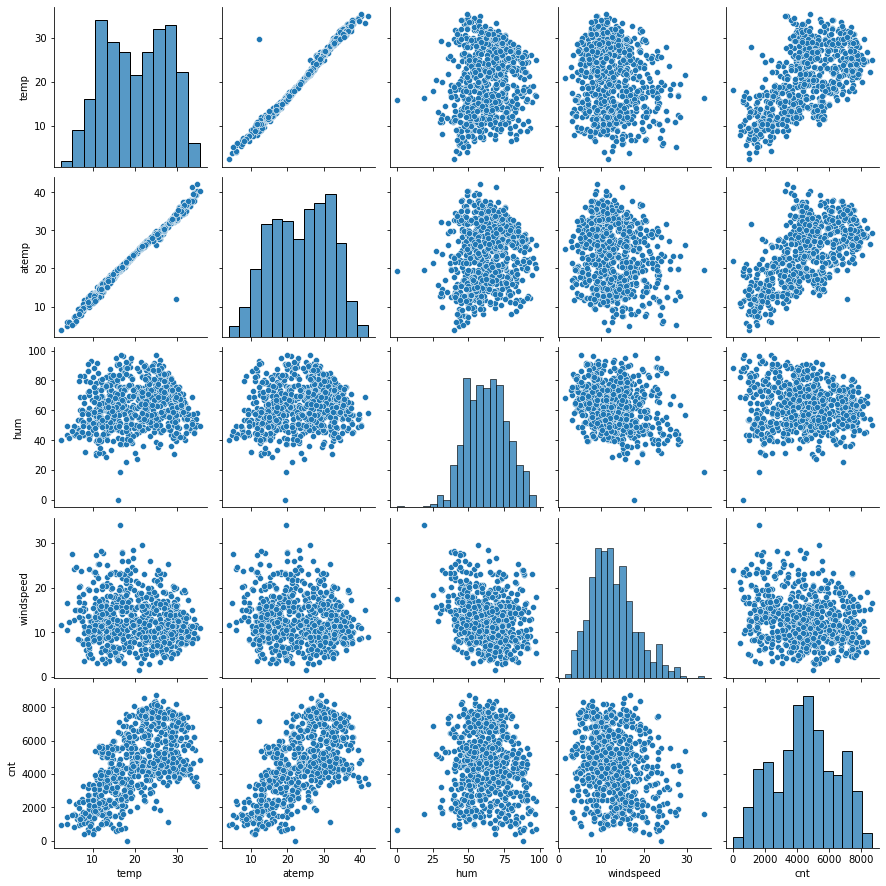

In [16]:
sns.pairplot(boombikes_data,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

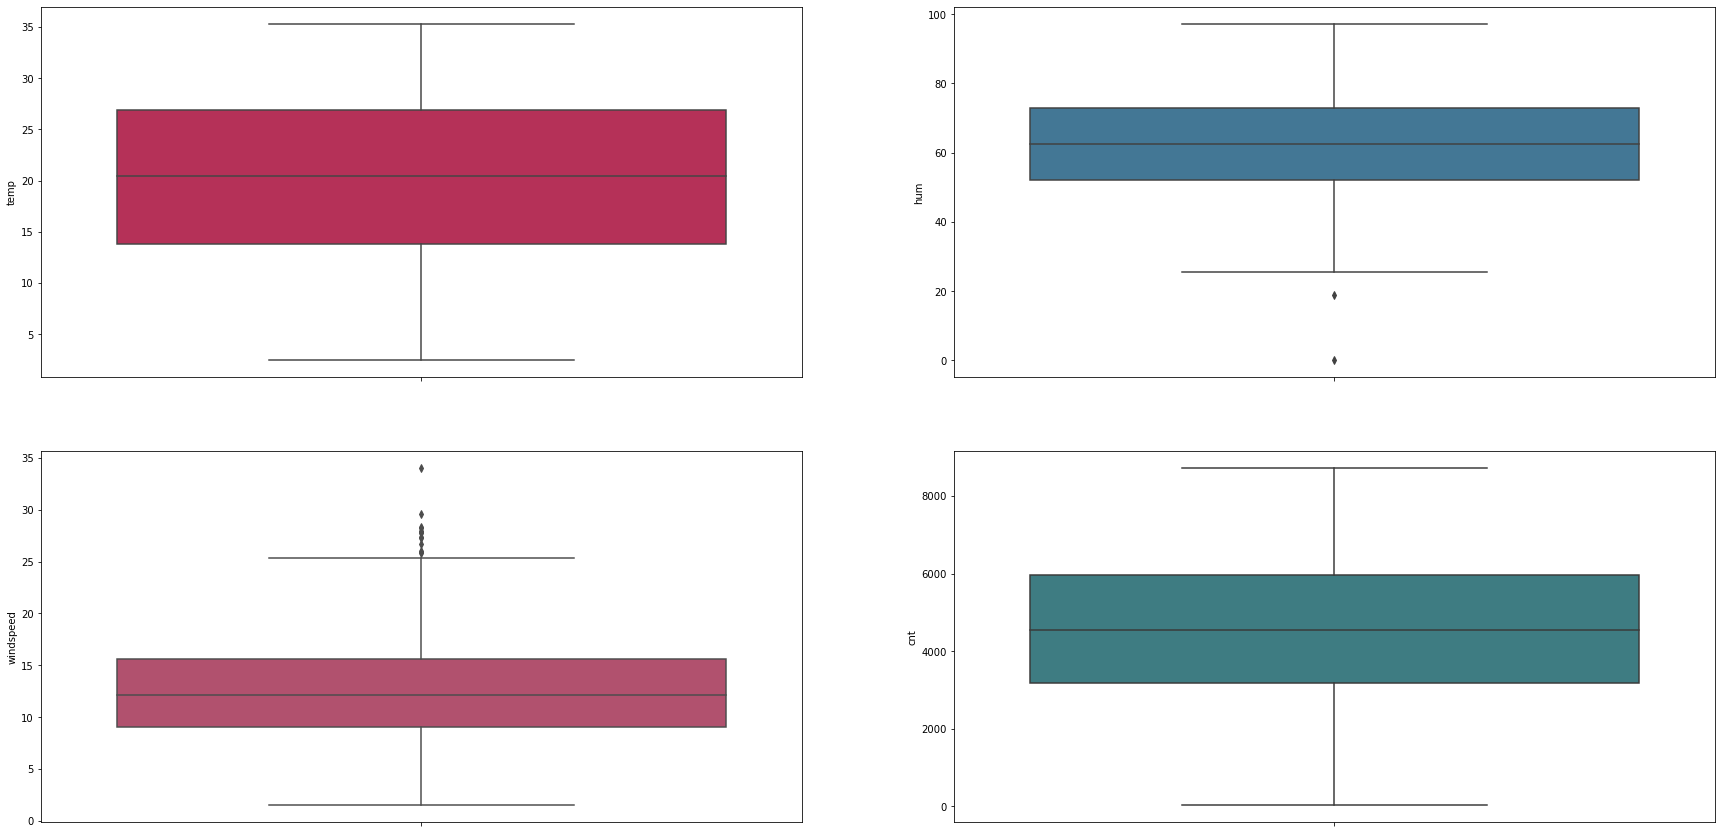

In [17]:
# box plotting of the univariate

plt.figure(figsize=(30, 15))
plt.subplot(2,2,1)
sns.boxplot(data = boombikes_data, y='temp',palette='rocket')

plt.subplot(2,2,2)
sns.boxplot(data = boombikes_data, y='hum' , palette='mako')

plt.subplot(2,2,3)
sns.boxplot(data = boombikes_data, y='windspeed', palette='flare')

plt.subplot(2,2,4)
sns.boxplot(data = boombikes_data, y='cnt',palette='crest')
plt.show()

humidity (hum) and windspeed are having outlier

#### 2. Bivariate analysis

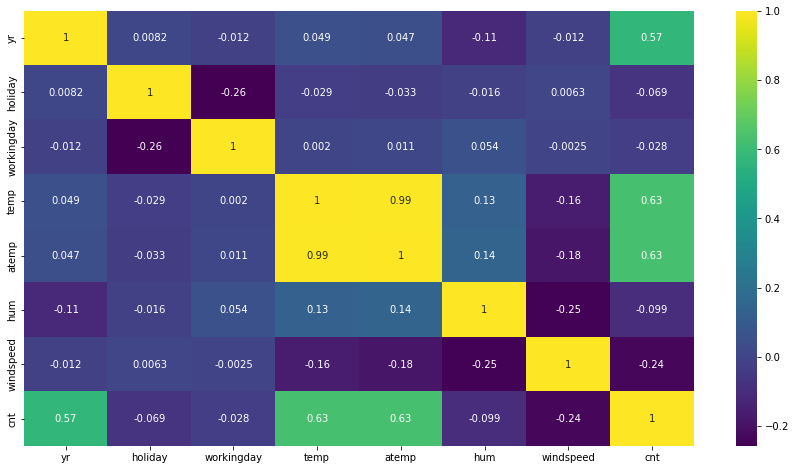

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(boombikes_data.corr(),annot=True,cmap='viridis')
plt.show()

As temp and atemp are directly corelated amongst each other so we will drop atemp and use temp

In [19]:
boombikes_data.drop(['atemp'],axis=1,inplace=True)

In [20]:
boombikes_data.shape

(730, 11)

In [21]:
boombikes_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

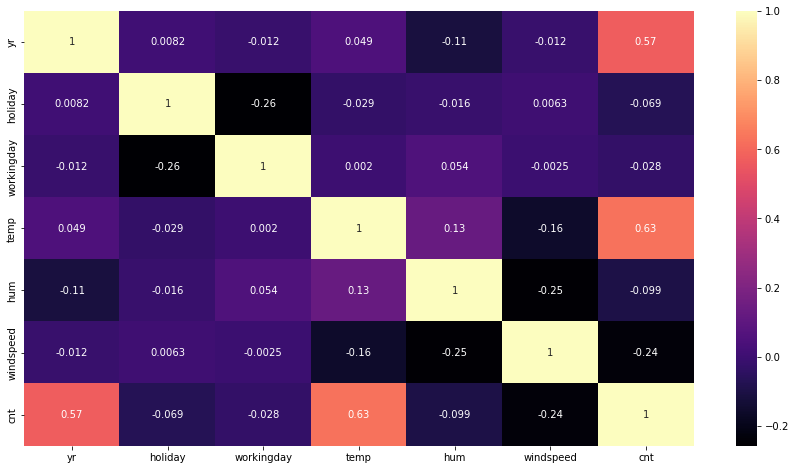

In [22]:
#checking correlation after removing atemp

plt.figure(figsize=(15,8))
sns.heatmap(boombikes_data.corr(),annot=True,cmap='magma')
plt.show()

temp is g=having higherst correlation with cnt

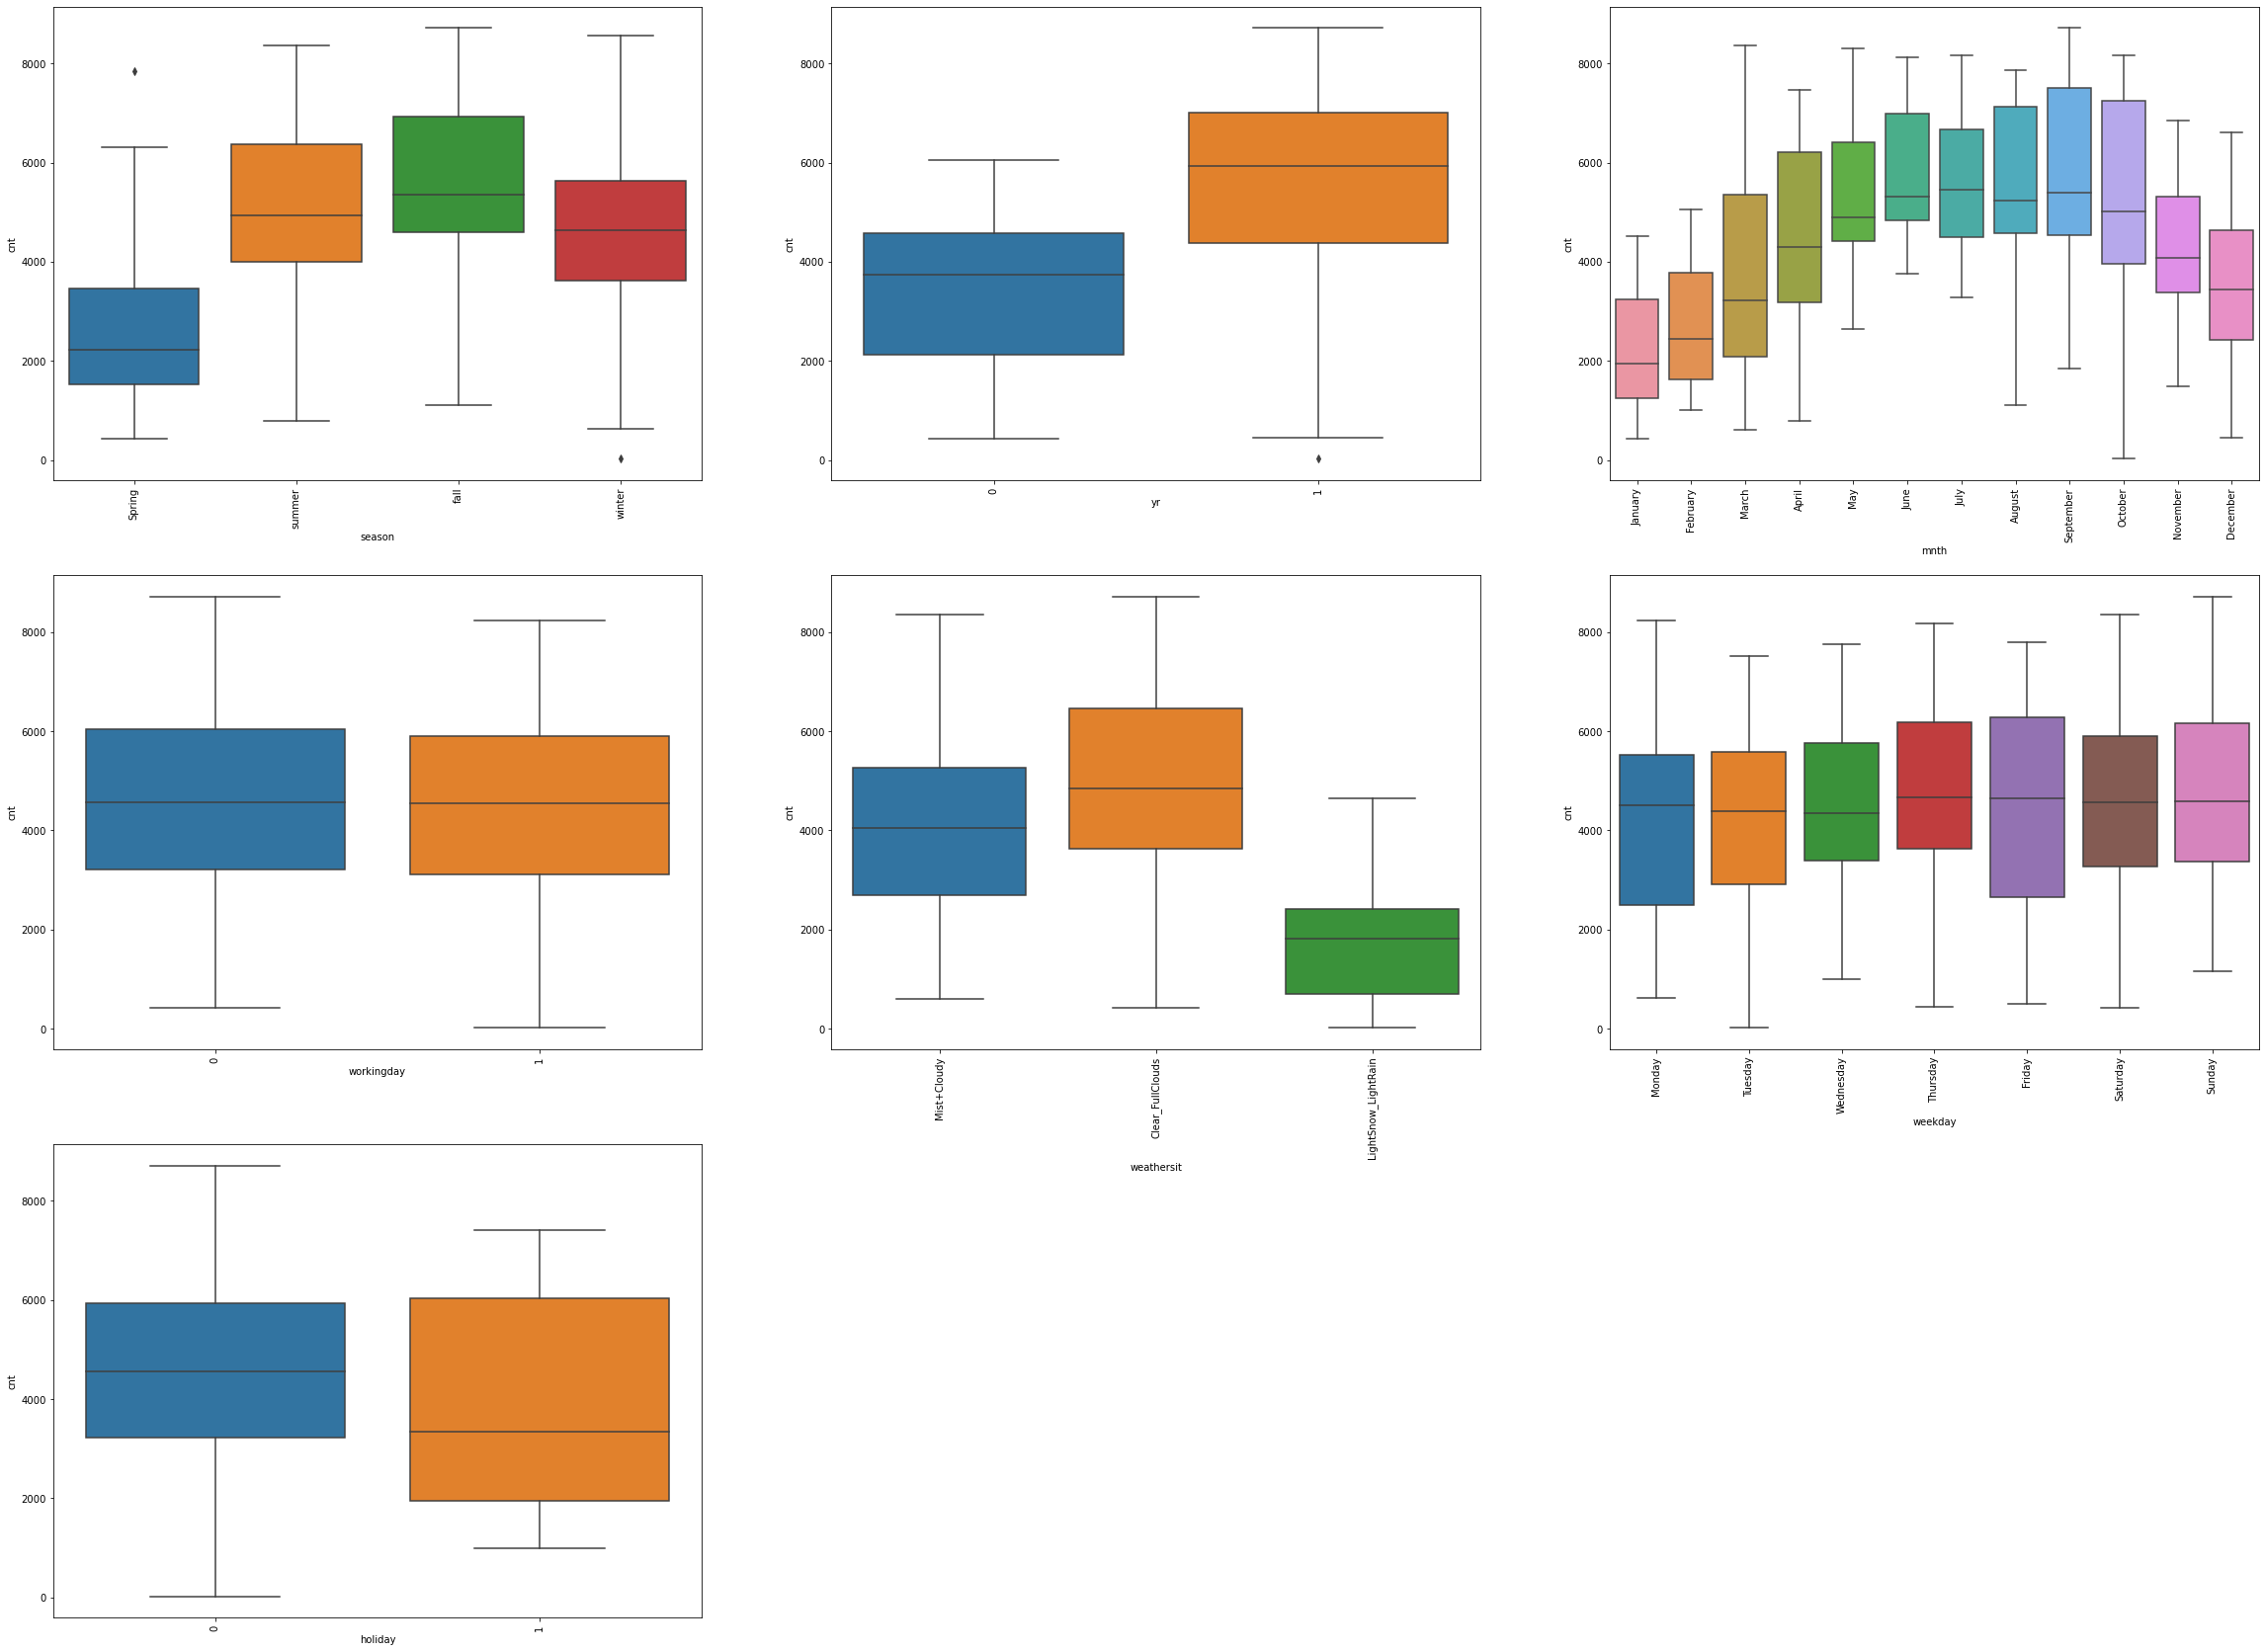

In [23]:
# boxplot for bivariabte analysis

plt.figure(figsize=(40, 30))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes_data)
plt.xticks(rotation = 90)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes_data)
plt.xticks(rotation = 90)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes_data)
plt.xticks(rotation = 90)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes_data)
plt.xticks(rotation = 90)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes_data)
plt.xticks(rotation = 90)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes_data)
plt.xticks(rotation = 90)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes_data)
plt.xticks(rotation = 90)
plt.show()

### Step 3: Data Preparation

In [24]:
boombikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Creating Dummy Variables 

In [25]:
dummy_variables = pd.get_dummies(boombikes_data[['season','weekday','mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
boombikes_data = pd.concat([boombikes_data,dummy_variables], axis = 1)

# drop season column
boombikes_data.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

boombikes_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_summer,season_winter,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
boombikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_fall                     730 non-null    uint8  
 8   season_summer                   730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  weekday_Monday                  730 non-null    uint8  
 11  weekday_Saturday                730 non-null    uint8  
 12  weekday_Sunday                  730 

In [27]:
boombikes_data.shape

(730, 29)

### Step 4: Splitting the Data into Training and Testing Sets

In [28]:
# Splitting the data

from sklearn.model_selection import train_test_split

# splitting the train and test based on 100 random variable
boombikes_train,boombikes_test = train_test_split(boombikes_data,train_size=0.7,test_size=0.3,random_state = 100)

In [29]:
boombikes_train.shape

(510, 29)

In [30]:
boombikes_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_November', 'mnth_October', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy'],
      dtype='object')

In [31]:
boombikes_test.shape

(219, 29)

In [32]:
boombikes_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_November', 'mnth_October', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy'],
      dtype='object')

In [33]:
boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_summer,season_winter,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,1,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_summer,season_winter,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,1,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,1,0,0,0,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
boombikes_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              219 non-null    int64  
 1   holiday                         219 non-null    int64  
 2   workingday                      219 non-null    int64  
 3   temp                            219 non-null    float64
 4   hum                             219 non-null    float64
 5   windspeed                       219 non-null    float64
 6   cnt                             219 non-null    int64  
 7   season_fall                     219 non-null    uint8  
 8   season_summer                   219 non-null    uint8  
 9   season_winter                   219 non-null    uint8  
 10  weekday_Monday                  219 non-null    uint8  
 11  weekday_Saturday                219 non-null    uint8  
 12  weekday_Sunday                  219

In [36]:
#scaling the numerical data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#for train

numeric_var = ['temp','hum','windspeed','cnt']

boombikes_train[numeric_var] = scaler.fit_transform(boombikes_train[numeric_var])

boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_summer,season_winter,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
boombikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_summer,season_winter,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.262745,0.245098,0.24902,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.440557,0.430568,0.43287,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# for test

boombikes_test[numeric_var] = scaler.fit_transform(boombikes_test[numeric_var])

boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_summer,season_winter,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
184,0,1,0,0.837241,0.534223,0.149393,0.704300,1,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,...,0,0,1,0,0,0,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0.278853,0,0,1,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,0.545512,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
boombikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_summer,season_winter,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.508750,0.418870,0.516216,0.246575,0.264840,0.232877,...,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.249189,0.201253,0.188111,0.238702,0.432005,0.442259,0.423633,...,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [40]:
# dividing x and y dfor train data
y_train = boombikes_train.pop('cnt')

X_train = boombikes_train

X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_summer,season_winter,weekday_Monday,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# dividing x and y for test data

y_test = boombikes_test.pop('cnt')

X_test = boombikes_test

X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_summer,season_winter,weekday_Monday,...,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy
184,0,1,0,0.837241,0.534223,0.149393,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 5: Building a linear model

#### Recursive Feature Evaliation

In [42]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_July', 'mnth_June', 'mnth_March',
       'mnth_May', 'mnth_November', 'mnth_October', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy'],
      dtype='object')

Running Recursive Feature Evaluation (RFE) to select 15 number of variable

In [43]:
# importing Linear Regressiona and RFE package

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

In [44]:
#creating object for linear regression

lm = LinearRegression()

#fitting the model

lm.fit(X_train,y_train)

#running RFE

rfe = RFE(lm,15)

rfe = rfe.fit(X_train,y_train)

#checking column with support and ranking

list(zip(X_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 10),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weathersit_LightSnow_LightRain', True, 1),
 ('weathersit_Mist+Cloudy', True, 1)]

In [45]:
#select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_fall',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'mnth_August', 'mnth_February', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_October'],
      dtype='object')

#### Building model using statsmodel 

In [47]:
import statsmodels.api as sm

X_train_rfe = X_train[col]

X_train_rfe_1 = sm.add_constant(X_train_rfe)

In [48]:
#Created a fitting model

lm1 = sm.OLS(y_train,X_train_rfe_1).fit()

In [49]:
#summary of the model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.34e-189
Time:                        21:00:22   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [50]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
2,temp,27.14
3,hum,21.12
5,season_fall,7.52
7,season_winter,4.07
4,windspeed,3.73
6,season_summer,3.65
14,weathersit_Mist+Cloudy,2.19
0,yr,2.05
11,mnth_November,1.89
9,mnth_January,1.63


As per above table the column <code style="background:yellow;color:black">temp</code> has an <code style="background:yellow;color:black">highest VIF </code> . So we will drop it

In [51]:
X_train_rfe = X_train_rfe.drop(['temp'],axis=1)

In [52]:
X_train_rfe.columns

Index(['yr', 'holiday', 'hum', 'windspeed', 'season_fall', 'season_summer',
       'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [53]:
X_train_rfe_2 = sm.add_constant(X_train_rfe)

In [54]:
lm2 = sm.OLS(y_train,X_train_rfe_2).fit()

In [55]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     135.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.45e-159
Time:                        21:00:22   Log-Likelihood:                 439.92
No. Observations:                 510   AIC:                            -849.8
Df Residuals:                     495   BIC:                            -786.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
2,hum,11.66
4,season_fall,3.72
3,windspeed,3.61
6,season_winter,3.60
5,season_summer,2.62
0,yr,1.98
13,weathersit_Mist+Cloudy,1.98
10,mnth_November,1.79
9,mnth_July,1.57
8,mnth_January,1.52


As per above table the column <code style="background:yellow;color:black">hum</code> has an <code style="background:yellow;color:black">highest VIF </code> . So we will drop it

In [57]:
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

In [58]:
X_train_rfe.columns

Index(['yr', 'holiday', 'windspeed', 'season_fall', 'season_summer',
       'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [59]:
X_train_rfe_3 = sm.add_constant(X_train_rfe)

In [60]:
lm3 = sm.OLS(y_train,X_train_rfe_3).fit()

In [61]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.50e-160
Time:                        21:00:22   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [62]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
2,windspeed,2.90
5,season_winter,2.62
3,season_fall,2.51
0,yr,1.92
9,mnth_November,1.79
4,season_summer,1.77
8,mnth_July,1.57
12,weathersit_Mist+Cloudy,1.53
10,mnth_September,1.43
6,mnth_December,1.39


As per above table the column <code style="background:yellow;color:black">windspeed</code> has an <code style="background:yellow;color:black">VIF more than 2</code> . So we will drop it

In [63]:
X_train_rfe = X_train_rfe.drop(['windspeed'],axis=1)

In [64]:
X_train_rfe.columns

Index(['yr', 'holiday', 'season_fall', 'season_summer', 'season_winter',
       'mnth_December', 'mnth_January', 'mnth_July', 'mnth_November',
       'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [65]:
X_train_rfe_4 = sm.add_constant(X_train_rfe)

In [66]:
lm4 = sm.OLS(y_train,X_train_rfe_4).fit()

In [67]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     141.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          7.28e-152
Time:                        21:00:22   Log-Likelihood:                 417.76
No. Observations:                 510   AIC:                            -809.5
Df Residuals:                     497   BIC:                            -754.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [68]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
4,season_winter,2.49
2,season_fall,2.31
0,yr,1.81
8,mnth_November,1.78
7,mnth_July,1.57
11,weathersit_Mist+Cloudy,1.50
9,mnth_September,1.43
3,season_summer,1.37
5,mnth_December,1.37
6,mnth_January,1.15


As per above table the column <code style="background:yellow;color:black">season_winter</code> has an <code style="background:yellow;color:black">VIF more than 2</code> . So we will drop it

In [69]:
X_train_rfe = X_train_rfe.drop(['season_winter'],axis=1)

In [70]:
X_train_rfe.columns

Index(['yr', 'holiday', 'season_fall', 'season_summer', 'mnth_December',
       'mnth_January', 'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy'],
      dtype='object')

In [71]:
X_train_rfe_5 = sm.add_constant(X_train_rfe)

In [72]:
lm5 = sm.OLS(y_train,X_train_rfe_5).fit()

In [73]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     97.28
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.04e-116
Time:                        21:00:22   Log-Likelihood:                 330.99
No. Observations:                 510   AIC:                            -638.0
Df Residuals:                     498   BIC:                            -587.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [74]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
2,season_fall,2.19
0,yr,1.69
6,mnth_July,1.56
10,weathersit_Mist+Cloudy,1.43
8,mnth_September,1.39
3,season_summer,1.32
5,mnth_January,1.13
7,mnth_November,1.13
4,mnth_December,1.09
1,holiday,1.05


As per above table the column <code style="background:yellow;color:black">season_fall</code> has an <code style="background:yellow;color:black">VIF more than 2</code> . So we will drop it

In [75]:
X_train_rfe = X_train_rfe.drop(['season_fall'],axis=1)

In [76]:
X_train_rfe.columns

Index(['yr', 'holiday', 'season_summer', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy'],
      dtype='object')

In [77]:
X_train_rfe_6 = sm.add_constant(X_train_rfe)

In [78]:
lm6 = sm.OLS(y_train,X_train_rfe_6).fit()

In [79]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     88.36
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.05e-103
Time:                        21:00:22   Log-Likelihood:                 298.39
No. Observations:                 510   AIC:                            -574.8
Df Residuals:                     499   BIC:                            -528.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

As p value of mnth_November are more than mnth_december and season_summer .
So the mnth_November is insignificant

In [80]:
X_train_rfe = X_train_rfe.drop(['mnth_November'],axis=1)

In [81]:
X_train_rfe.columns

Index(['yr', 'holiday', 'season_summer', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [82]:
X_train_rfe_7 = sm.add_constant(X_train_rfe)

lm7 = sm.OLS(y_train,X_train_rfe_7).fit()

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     98.19
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.39e-104
Time:                        21:00:22   Log-Likelihood:                 298.08
No. Observations:                 510   AIC:                            -576.2
Df Residuals:                     500   BIC:                            -533.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [83]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
0,yr,1.48
8,weathersit_Mist+Cloudy,1.37
2,season_summer,1.26
4,mnth_January,1.11
6,mnth_September,1.10
3,mnth_December,1.08
5,mnth_July,1.06
1,holiday,1.02
7,weathersit_LightSnow_LightRain,1.02


In [84]:
#ADDING WEEKDAY_SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['weekday_Saturday']=X_train['weekday_Saturday']
X_train_rfe.head()

,yr,holiday,season_summer,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,weekday_Saturday
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,1,0,0,0,0
426,1,0,0,0,0,0,0,0,1,0
728,1,0,0,1,0,0,0,0,0,0
482,1,0,1,0,0,0,0,0,1,0


In [85]:
X_train_rfe_8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe_8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     88.57
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          7.25e-104
Time:                        21:00:22   Log-Likelihood:                 298.77
No. Observations:                 510   AIC:                            -575.5
Df Residuals:                     499   BIC:                            -529.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [86]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
0,yr,1.50
8,weathersit_Mist+Cloudy,1.38
2,season_summer,1.27
4,mnth_January,1.11
6,mnth_September,1.11
9,weekday_Saturday,1.11
3,mnth_December,1.08
5,mnth_July,1.07
1,holiday,1.02
7,weathersit_LightSnow_LightRain,1.02


In [87]:
#ADDING WEEKDAY_SUNDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['weekday_Sunday']=X_train['weekday_Sunday']
X_train_rfe.head()

,yr,holiday,season_summer,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,weekday_Saturday,weekday_Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0,0,0,0,0,1,0,1
728,1,0,0,1,0,0,0,0,0,0,0
482,1,0,1,0,0,0,0,0,1,0,1


In [88]:
X_train_rfe_9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe_9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     80.63
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.07e-103
Time:                        21:00:23   Log-Likelihood:                 299.33
No. Observations:                 510   AIC:                            -574.7
Df Residuals:                     498   BIC:                            -523.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [89]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
0,yr,1.52
8,weathersit_Mist+Cloudy,1.41
2,season_summer,1.28
10,weekday_Sunday,1.16
9,weekday_Saturday,1.13
4,mnth_January,1.12
6,mnth_September,1.11
3,mnth_December,1.09
5,mnth_July,1.08
1,holiday,1.02


In [90]:
#ADDING WORKINGDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,season_summer,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,weekday_Saturday,weekday_Sunday,workingday
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,1,0,0,0,0,0,1
426,1,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0,1,0,0,0,0,0,0,0,1
482,1,0,1,0,0,0,0,0,1,0,1,0


In [91]:
X_train_rfe_10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe_10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     73.82
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.33e-102
Time:                        21:00:23   Log-Likelihood:                 299.46
No. Observations:                 510   AIC:                            -572.9
Df Residuals:                     497   BIC:                            -517.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [92]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
11,workingday,3.05
0,yr,2.02
8,weathersit_Mist+Cloudy,1.59
2,season_summer,1.58
10,weekday_Sunday,1.48
9,weekday_Saturday,1.39
4,mnth_January,1.21
3,mnth_December,1.20
5,mnth_July,1.19
6,mnth_September,1.19


Working day is having VIF value more than 2 . 

In [93]:
# removing working day
X_train_rfe = X_train_rfe.drop(['workingday'],axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'season_summer', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy', 'weekday_Saturday', 'weekday_Sunday'],
      dtype='object')

In [94]:
X_train_rfe_11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe_11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     80.63
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.07e-103
Time:                        21:00:23   Log-Likelihood:                 299.33
No. Observations:                 510   AIC:                            -574.7
Df Residuals:                     498   BIC:                            -523.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [95]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
0,yr,1.52
8,weathersit_Mist+Cloudy,1.41
2,season_summer,1.28
10,weekday_Sunday,1.16
9,weekday_Saturday,1.13
4,mnth_January,1.12
6,mnth_September,1.11
3,mnth_December,1.09
5,mnth_July,1.08
1,holiday,1.02


Weekday_Sunday is having more p value --> 0.295

In [96]:
#removing weekday_sunday
X_train_rfe = X_train_rfe.drop(['weekday_Sunday'],axis=1)

In [97]:
X_train_rfe.columns

Index(['yr', 'holiday', 'season_summer', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy', 'weekday_Saturday'],
      dtype='object')

In [98]:
X_train_rfe_12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe_12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     88.57
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          7.25e-104
Time:                        21:00:23   Log-Likelihood:                 298.77
No. Observations:                 510   AIC:                            -575.5
Df Residuals:                     499   BIC:                            -529.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Weekday_Saturday is having more p value --> 0.244

In [99]:
#removing weekday_saturday
X_train_rfe = X_train_rfe.drop(['weekday_Saturday'],axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'season_summer', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy'],
      dtype='object')

In [100]:
#adding mnth_february to improve model
X_train_rfe['mnth_February']=X_train['mnth_February']
X_train_rfe.head()

,yr,holiday,season_summer,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,1,0,0,0,0
426,1,0,0,0,0,0,0,0,1,0
728,1,0,0,1,0,0,0,0,0,0
482,1,0,1,0,0,0,0,0,1,0


In [101]:
X_train_rfe_13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe_13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     122.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.14e-127
Time:                        21:00:23   Log-Likelihood:                 354.18
No. Observations:                 510   AIC:                            -686.4
Df Residuals:                     499   BIC:                            -639.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [102]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
0,yr,1.53
8,weathersit_Mist+Cloudy,1.39
2,season_summer,1.28
4,mnth_January,1.11
6,mnth_September,1.11
3,mnth_December,1.08
5,mnth_July,1.07
9,mnth_February,1.07
1,holiday,1.03
7,weathersit_LightSnow_LightRain,1.02


season_summer is having highest p-value --> 0.529

In [103]:
# Removing season_summer
X_train_rfe = X_train_rfe.drop(['season_summer'],axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy', 'mnth_February'],
      dtype='object')

In [104]:
X_train_rfe_14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe_14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.18e-128
Time:                        21:00:23   Log-Likelihood:                 353.98
No. Observations:                 510   AIC:                            -688.0
Df Residuals:                     500   BIC:                            -645.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [105]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
0,yr,1.36
7,weathersit_Mist+Cloudy,1.30
3,mnth_January,1.09
5,mnth_September,1.09
2,mnth_December,1.06
4,mnth_July,1.06
8,mnth_February,1.06
1,holiday,1.03
6,weathersit_LightSnow_LightRain,1.02


In [106]:
#adding mnth_august to improve model
X_train_rfe['mnth_August']=X_train['mnth_August']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,1,0,0,0,0,0
426,1,0,0,0,0,0,0,1,0,0
728,1,0,1,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,1,0,0


In [107]:
X_train_rfe_15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe_15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.51e-133
Time:                        21:00:23   Log-Likelihood:                 368.62
No. Observations:                 510   AIC:                            -715.2
Df Residuals:                     499   BIC:                            -668.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [108]:
vif_data_1 = pd.DataFrame()

X = X_train_rfe

vif_data_1['Feature'] = X.columns

vif_data_1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif_data_1['VIF'] = round(vif_data_1['VIF'],2)

vif_data_1 = vif_data_1.sort_values(by="VIF",ascending=False)

vif_data_1

,Feature,VIF
0,yr,1.44
7,weathersit_Mist+Cloudy,1.32
9,mnth_August,1.11
3,mnth_January,1.10
5,mnth_September,1.10
2,mnth_December,1.07
4,mnth_July,1.06
8,mnth_February,1.06
1,holiday,1.03
6,weathersit_LightSnow_LightRain,1.02


#### MODEL HAS IMPROVED SO WE KEEP mnth_august

In [109]:
# #adding mnth_October to improve model
X_train_rfe['mnth_October']=X_train['mnth_October']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,1,0,0,0


In [110]:
X_train_rfe_15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe_15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.16e-135
Time:                        21:00:23   Log-Likelihood:                 375.39
No. Observations:                 510   AIC:                            -726.8
Df Residuals:                     498   BIC:                            -676.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [111]:
#adding weekday_Monday to improve model
X_train_rfe['weekday_Monday']=X_train['weekday_Monday']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,weekday_Monday
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,1
482,1,0,0,0,0,0,0,1,0,0,0,0


In [112]:
X_train_rfe_16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe_16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     115.6
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.73e-135
Time:                        21:00:23   Log-Likelihood:                 378.34
No. Observations:                 510   AIC:                            -730.7
Df Residuals:                     497   BIC:                            -675.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

weekday_monday having highest p-valuen --> 0.016

In [113]:
# removing weekday_monday
X_train_rfe = X_train_rfe.drop(['weekday_Monday'],axis=1)

X_train_rfe.columns

Index(['yr', 'holiday', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy', 'mnth_February', 'mnth_August',
       'mnth_October'],
      dtype='object')

In [114]:
#Adding mnth_monday to imporve
X_train_rfe['mnth_May']=X_train['mnth_May']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,mnth_May
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,1,0,0,0,0


In [115]:
X_train_rfe_17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe_17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.61e-139
Time:                        21:00:23   Log-Likelihood:                 388.41
No. Observations:                 510   AIC:                            -750.8
Df Residuals:                     497   BIC:                            -695.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [116]:
X_train_rfe['weekday_Thursday']=X_train['weekday_Thursday']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,mnth_May,weekday_Thursday
653,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,1,0,0,0,0,0


In [117]:
X_train_rfe_17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe_17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     112.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          7.69e-139
Time:                        21:00:23   Log-Likelihood:                 389.30
No. Observations:                 510   AIC:                            -750.6
Df Residuals:                     496   BIC:                            -691.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [118]:
X_train_rfe = X_train_rfe.drop(['weekday_Thursday'],axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy', 'mnth_February', 'mnth_August',
       'mnth_October', 'mnth_May'],
      dtype='object')

In [119]:
X_train_rfe['weekday_Tuesday']=X_train['weekday_Tuesday']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,mnth_May,weekday_Tuesday
653,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,1,0,0,0,0,0


In [120]:
X_train_rfe_18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe_18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     113.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.88e-139
Time:                        21:00:23   Log-Likelihood:                 390.01
No. Observations:                 510   AIC:                            -752.0
Df Residuals:                     496   BIC:                            -692.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [121]:
X_train_rfe = X_train_rfe.drop(['weekday_Tuesday'],axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy', 'mnth_February', 'mnth_August',
       'mnth_October', 'mnth_May'],
      dtype='object')

In [122]:
X_train_rfe['weekday_Wednesday']=X_train['weekday_Wednesday']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,mnth_May,weekday_Wednesday
653,1,0,0,0,0,0,0,0,0,0,1,0,1
576,1,0,0,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,1,0,0,0,0,0


In [123]:
X_train_rfe_19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe_19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.82e-138
Time:                        21:00:23   Log-Likelihood:                 388.41
No. Observations:                 510   AIC:                            -748.8
Df Residuals:                     496   BIC:                            -689.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [124]:
X_train_rfe = X_train_rfe.drop(['weekday_Wednesday'],axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_September', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist+Cloudy', 'mnth_February', 'mnth_August',
       'mnth_October', 'mnth_May'],
      dtype='object')

In [125]:
X_train_rfe['mnth_June']=X_train['mnth_June']
X_train_rfe.head()

,yr,holiday,mnth_December,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,mnth_May,mnth_June
653,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,1,0,0,0,0,0


In [126]:
X_train_rfe_20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe_20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     132.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.89e-152
Time:                        21:00:24   Log-Likelihood:                 420.57
No. Observations:                 510   AIC:                            -813.1
Df Residuals:                     496   BIC:                            -753.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [127]:
X_train_rfe = X_train_rfe.drop(['mnth_December'],axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy',
       'mnth_February', 'mnth_August', 'mnth_October', 'mnth_May',
       'mnth_June'],
      dtype='object')

In [128]:
X_train_rfe_21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe_21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.6
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.01e-151
Time:                        21:00:24   Log-Likelihood:                 417.43
No. Observations:                 510   AIC:                            -808.9
Df Residuals:                     497   BIC:                            -753.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [129]:
X_train_rfe['mnth_March']=X_train['mnth_March']
X_train_rfe.head()

,yr,holiday,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,mnth_May,mnth_June,mnth_March
653,1,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,1,0,0,0,0,0,0


In [130]:
X_train_rfe_22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe_22).fit()
print(lm22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          2.26e-152
Time:                        21:00:24   Log-Likelihood:                 421.55
No. Observations:                 510   AIC:                            -815.1
Df Residuals:                     496   BIC:                            -755.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [131]:
X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)
X_train_rfe.columns

Index(['yr', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy',
       'mnth_February', 'mnth_August', 'mnth_October', 'mnth_May', 'mnth_June',
       'mnth_March'],
      dtype='object')

In [132]:
X_train_rfe_23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe_23).fit()
print(lm23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     142.0
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          6.00e-152
Time:                        21:00:24   Log-Likelihood:                 417.96
No. Observations:                 510   AIC:                            -809.9
Df Residuals:                     497   BIC:                            -754.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [133]:
X_train_rfe = X_train_rfe.drop(['mnth_March'],axis=1)
X_train_rfe.columns

Index(['yr', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy',
       'mnth_February', 'mnth_August', 'mnth_October', 'mnth_May',
       'mnth_June'],
      dtype='object')

In [134]:
X_train_rfe_24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe_24).fit()
print(lm24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     152.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.43e-151
Time:                        21:00:24   Log-Likelihood:                 414.44
No. Observations:                 510   AIC:                            -804.9
Df Residuals:                     498   BIC:                            -754.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### We have considered all columns and checked.Now we stop the model building and check on which model can we choose
#### Out all the models model <code style="background:yellow;color:black">lm21</code> seems to give good result so we choose it.

### Step 6: Residual Analysis of the train data

In [135]:
#value prediction

y_train_cnt = lm21.predict(X_train_rfe_21)

In [136]:
# calculating the residual of actual data and predicted data
residual = y_train - y_train_cnt

Text(0.5, 0, 'Errors')

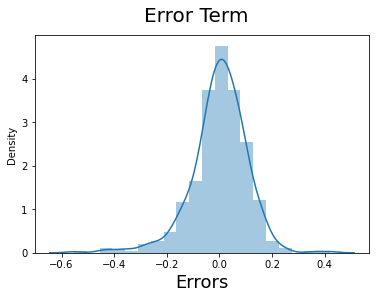

In [137]:
#Plotting the histogram of the error term

fig = plt.figure()
sns.distplot((residual) , bins = 20)
fig.suptitle('Error Term',fontsize = 20)
plt.xlabel('Errors',fontsize=18)

In [138]:
X_train_rfe_21.columns

Index(['const', 'yr', 'holiday', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy',
       'mnth_February', 'mnth_August', 'mnth_October', 'mnth_May',
       'mnth_June'],
      dtype='object')

In [139]:
print(X_train_rfe_21.shape)
print(residual.shape)

(510, 13)
(510,)


### Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the tests set

In [140]:
X_train_new=X_train_rfe_21.drop(['const'], axis=1)

In [141]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [142]:
X_train_rfe_21.columns


Index(['const', 'yr', 'holiday', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy',
       'mnth_February', 'mnth_August', 'mnth_October', 'mnth_May',
       'mnth_June'],
      dtype='object')

### Step 8: Model Evaluation

In [143]:
y_pred = lm21.predict(X_test_new)

Text(0, 0.5, 'y_pred')

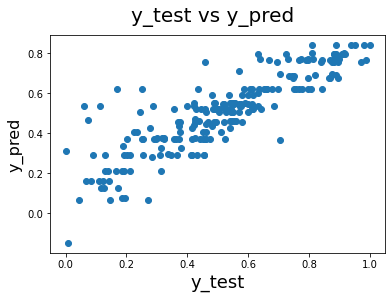

In [144]:
#CHECKING PREDICTED V/s TEST DATA 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

In [145]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [146]:
#Calculating Mean Square Error
np.sqrt(mean_squared_error(y_test,y_pred))

0.12074191385703023

In [147]:
##Calculating Adjacent R square
r_squared = r2_score(y_test,y_pred)
r_squared

0.7429648207650721

r2 of our model is 74.2%

In [148]:
X_t_value  = X_train_new.iloc[:,0].values

In [149]:
#Calculating Adjacent R square
N= len(X_test)          
p =len(numeric_var)     
r2_test_adj = round((1-((1-r_squared)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.738


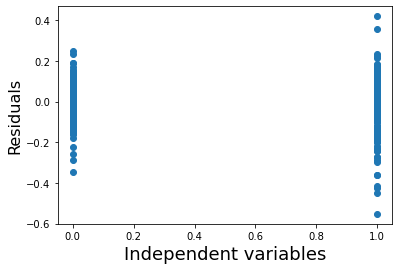

In [150]:
plt.figure()
plt.scatter(X_t_value,residual)
fig.suptitle('Independent vars vs res', fontsize=20)             
plt.xlabel('Independent variables', fontsize=18)                      
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [151]:
X_train_new.head()

,yr,holiday,mnth_January,mnth_July,mnth_September,weathersit_LightSnow_LightRain,weathersit_Mist+Cloudy,mnth_February,mnth_August,mnth_October,mnth_May,mnth_June
653,1,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,1,0,0,0,0,0


In [152]:

print(X_train_rfe_21.columns)
print(lm21.summary())

Index(['const', 'yr', 'holiday', 'mnth_January', 'mnth_July', 'mnth_September',
       'weathersit_LightSnow_LightRain', 'weathersit_Mist+Cloudy',
       'mnth_February', 'mnth_August', 'mnth_October', 'mnth_May',
       'mnth_June'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.6
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.01e-151
Time:                        21:00:25   Log-Likelihood:                 417.43
No. Observations:                 510   AIC:                            -808.9
Df Residuals:                     497   BIC:                            -753.8
Df Model:                          12                                         
Covariance Type:            nonr

We can see that the equation of our best fitted line is:

### cnt = 0.249×yr+(-0.074)×holiday+(-0.021)×mnth_January+0.15×mnth_July+0.21×mnth_September+(-0.3079)x weathersit_LightSnow_LightRain+(-0.082)×weathersit_Mist+Cloud +(-0.1627)xmnth_February+0.1805 x mnth_August + 0.13x mnth_October + 0.14 x mnth_May + 0.17 x mnth_June